# Objektově orientované programování

Python je jak již bylo řečeno multiparadigmatický programovací jazyk tj. podporuje více různých stylů programování. Přesto však jen jedno z těchto tzv. paradigmat ovlivňuje Python na všech úrovních programování — objektově orientované paradigma (OOP).

Ve světě tohoto paradigmatu existují tzv. objekty, které mají svou jedinečnou identitu, mění své stavy, vznikají a zanikají. Především však spolu komunikají prostřednictvím volání metod ze svých rozhraní (rozhraní je množina metod, které objekty nabízejí ostatním objektům).

Objekty se navíc seskupují do tříd. Třída obsahuje objekty se stejným rozhraním, tj. objekty, které se při komunikaci chovají podobně (resp. stejně, pokud mají identický vnitřní stav).

S objekty a třídami jsme se již setkali. Čísla jsou v Pythonu velmi jednoduché objekty, které jako své rozhraní nabízejí běžné aritmetické operace. Základními číselnými třídami jsou třídy `int` (representace celých čísel) a `float` (representace racionálních čísel pomocí tzv. pohyblivé řádové čárky). Mezi jednoduché objekty patří i objekty třídy `bool` (jsou jen dva `True` a `False`).

O něco složitější jsou objekty třídy `string` označované jako řetězce. Ty nabízejí ve svém rozhraní větší počet metod. S číselnými objekty však sdílejí dvě podstatné a vzájemně provázané vlastnosti: jsou neměnné a a z vnějšího pohledu existuje vždy jen jeden objekt se stejným stavem (např. z vnějšího pohledu existuje jen jeden objekt čísla 2). I když interně může existovat více kopií stejného objektu, jsou tyto objekty nerozlišitelné.

To již neplatí pro seznamy a mnohé další složitější objekty. Ty svůj stav v průběhu svého života mění, a jejich identita je nezávislá na jejich obsahu.

In [71]:
a = [1]
b = [1]

Proměnné `a` a `b` označují dva různé objekty, které mají stejný stav (u seznamů je stav určem jejich obsahem). Že tomu tak skutečně je poznáme, tím, že jeden objekt změnéme například přidáním prvku:

In [72]:
a.append(2)
print(a) # objekt odkazovaný proměnnou `a` se změnil
print(b) # objekt odkazovaný proměnnou `b` zůstal nezměněný (tj. oba objekty se liší už i obsahem)

[1, 2]
[1]


Mezi další proměnné individuální objekty, které již známe patří objekty planet z modulu `ephem` nebo objekty representující shodu regulárního výrazu s řetězcem (tzv. `match` objekty).

Naši paletu tříd si ještě rozšíříme o třídy ze dvou klíčových modulů. Začneme standardní representací časových a kalendářních údajů v Pythonu.

## Representace časových údajů

I když se to na první pohled nezdá, je representace časových údajů jednou z nejkomplikovanějších problémů tvůrců standardních knihoven. Důvodem je relativně komplikovaný kalendářní systém a ještě komplikovanejší systém časových pásem s jejich stálými posuny a šílenými pravidly pro jejich každoroční posuny (tzv. letní čas). Proti tomu jsou problémy dané vkládáním přestupné sekundy jen detail (může to však značně zkomplikovat program očekávající milisekundovou přesnost).

Ve skutečnosti se ukazuje, že žádná univerzálně použitelná representace času neexistuje. Proto i ve standardní knihovně Pythonu jich existuje několik, a mnohé další přidávají knihovny třetích stran (jako např. *pyephem*).

Základní a všeobecně podporovanou representaci nabízí standardní modul `datetime`. Tato implementace se zaměřuje na podporu representace času v moderní době a  moderním gregoriánském kalendáři (tj. cca po první světové válce) s přesností na úrovni minut či desítek vteřin. Hodí se tak pro běžné historické a průběžné databázové záznamy (datumy narození, časy prodejů apod.) a ekonomickou statistiku. Nepodporuje však správně časová pásma. Nezohledňuje totiž posuny časů v různých místech jako je změna pásmového času (v některých zemích se to děje i několikrát v desetiletí) a především letní čas. 

Jednodušší rozhraní nabízí knihovna pro ty aplikace, které se nemusí starat o časová pásma a využití letního času.

### Representace kalendářních údajů

In [73]:
import datetime

dnes = datetime.date.today()  # dnešek jako kalendářní den
den_d = datetime.date(1989, 11, 17)  # vytvoření kalendářního dne z roku, měsíce a dne

print(dnes)  # vypsání v univerzálním textovém formátu
print(den_d.year) # vypsání atributu (rok)


2020-02-01
1989


Objekty jsou nejčastěji vytvářeny tzv. konstruktory. Konstruktor je funkce, která má stejné jméno jako třída (v našem případě vytváříme třídy `datetime.date` tj. voláme konstruktor `datetime.date`). 

Nové objekty však často vznikají pomocí tzv. třídních metod. Tyto metody se nevolají nad objekty, ale nad třídami. Příkladem třídní metody je metoda `today`, která se volá nad třídou `datetime.date` (třída je ve volání uvedena vlevo od tečky, za níž následuje jméno metody). Bohužel vše je trochu matoucí, neboť Python používá tečku k několika různým účelům:

1) oddělení **jména modulu** od jména funkce nebo proměnné, pokud přistupujeme k funkci/proměnné z importovaného modulu

In [74]:
datetime.date(2000,1,1) # volání funkce (konstruktoru) z modulu `datetime`

datetime.date(2000, 1, 1)

In [75]:
import math

math.pi # proměnná umístěná v modulu `math`

3.141592653589793

2A) oddělení **objektu (adresáta)** a jména metody  (metoda je volána nad objektem)

In [76]:
"test".replace("t", "r") # metoda je volána nad objektem "test"

'resr'

In [77]:
x = [1]
x.clear() # metoda je volána nad objektem označeným proměnnou `x`

2B) oddělení **objektu** a jeho atributu (vlastnosti)

Atribut si lze představit viditelnou vlastnost objektu. Vlastnost je buď součástí vnitřního stavu nebo ji lze z vnitřního stavu jednoznačně odvodit. Na rozdíl od volání metody nenásledují za atributem závorky se seznamem parametrů.

In [78]:
import re

match = re.fullmatch("[A-z][a-z]*", "Gondor") # test shody řetězce s regulárním výrazem
match.string  # atributu objektu representujícího výsledek testu (hodnotou je testovaný řetězec) 

'Gondor'

3A) oddělení **jména třídy**  a jména metody při volání třídních metod

In [79]:
int.bit_length(42) # volání metody `bit_length` nad třídou `int`

6

Poznámka: Metoda `bit_length` vrací počet bitů nutných pro representaci čísla, které je předáno jako parametr.

In [80]:
float.is_integer(2.0)

True

Metoda `is_integer` je volána na třídu `float`. Vrací `True`, pokud je parametr metody celé číslo (o když representované jako `float`, pro čísla třídy `int` je tento test bezpředmětný).

3B) oddělení **jména třídy** a jejího atributu (atribut patří třídě jako takové nikoliv konkrétním objektům)

In [81]:
from datetime import date

print(date.max) # maximální representovatelné datum

9999-12-31


Všechny druhy tečkové notace lze přirozeně kombinovat v jediném zápisu. Následující zápis obsahuje tečku ve všech jejích hlavních rolích.

In [82]:
datetime.date.today().year

2020

Identifikátor `datetime` označuje jméno modulu. Ten obsahuje třídu `date`, na níž je možno zavolat třídní metodu `today`. Tato metoda vrací nový objekt této třídy (representující aktuálné den). Z tohoto objektu následně získáme atribut `year` (rok příslušného data). Na jednotlivé části zápisu se můžete podívat na následujícím obrázku:

![Komplexnější tečková notace](dotnotace.png)

Pokud Vám předchozí výraz připadá složitý, lze jej samoozřejmě rozepsat do několika jednodušších:

In [83]:
from datetime import date # jméno třídy není od této chvíle nutné kvalifikovat modulem

dnes = date.today()  # volání třídní metody, výsledkem je objekt třídy `datetime.date
letos = dnes.year   # a získáme jeho atribut
print(letos)

2020


> **Úkol**: Vytvořte objekt třídy `datetime.date` representující silvestr aktuálního roku. Program by měl využívat metodu `today`, aby fungoval v libovolném roce.

In [84]:
silvestr = date(date.today().year, 12, 31) # předpokládá `from datetime import date`
print(silvestr)

2020-12-31


Objekty třídy `datatime.date` nenabaízejí příliš mnoho metod. Mezi ty nejužitečnější patří: 

In [85]:
dnes = date.today()

print(dnes.weekday()) # vrací den v týdnu jako číslo (0 = pondělí, 1=úterý atd.)

tyden = ["pondělí", "úterý", "středa", "čtvrtek", "pátek", "sobota", "neděle"] # seznam řetězců

print(f"Dnes je {tyden[dnes.weekday()]}")

5
Dnes je sobota


In [86]:
dnes.strftime("%d.%m.%Y")  # převede datumový objekt na řetězec podle formátu

'01.02.2020'

Formát používaný v metodě `strftime` vychází z unixového příkazu `date`. Detailní popis by byl únavný, proto uvádím jen několik praktických příkladů.

In [87]:
print(dnes.strftime("%-d.%-m.%y")) # bez počátečních nul a bez století (všimněte si podtržítek)
print(dnes.strftime("%-d.%B %Y, %A")) # dlouhý tvar v implicitní lokalitě (nastavení jazyka) = en_US

1.2.20
1.February 2020, Saturday


Formátovací specifikace příkazu `strftime` lze využít i v běžném formátovaném řetězci.

In [88]:
f"Dnes je {date.today():%-d.%-m.}"

'Dnes je 1.2.'

Dva objekty typu `datetime.date` lze odečítat.

In [89]:
vznikRepubliky = date(1918,10,28)
dnes = date.today()

rozdil = dnes - vznikRepubliky
print(rozdil)

36986 days, 0:00:00


Výsledkem je objekt třídy `datetime.timedelta`, která representuje časový interval. Ten je primárně representován v dnech a vteřinách a jejich zlomcích, neboť neexistují žádné vyšší  jednotky fixní délky (kromě týdnů, ale ty jsou dost nepraktické) a ostatní hodiny a minuty lze dopočítat.

Objekty třídy `datetime.timedelta` lze vytvářet i přímo pomocí volání konstruktoru. V konstruktoru lze kombinovat různé standardní intervaly (týdny, dny, hodiny, minuty, sekundy) pomocí pojmenovaných parametrů (jejichž hodnotami nemusí být jen celá čísla)

In [90]:
from datetime import timedelta

interval = timedelta(weeks=3, days=5, hours=5.5, seconds=2.3)
print(interval)

26 days, 5:30:02.300000


Lze je pak přičítat k objektům `datetime.date`, čímž lze realizovat zadání typu "za čtrnáct dnů".

In [91]:
dnes + timedelta(days=14)

datetime.date(2020, 2, 15)

> **Úkol**: Zjistěte v jakých dnech jste slavili či budete slavit *tisiciny*, tj. dny kdy žijete $k\times 1000$ dnů (kde $k$ je přirozené číslo).

In [92]:
datumNarozeni = date(1971,7,20) # nahraťte svým datem narození
for i in range(20):
    print(datumNarozeni + timedelta(days=i*1_000))

1971-07-20
1974-04-15
1977-01-09
1979-10-06
1982-07-02
1985-03-28
1987-12-23
1990-09-18
1993-06-14
1996-03-10
1998-12-05
2001-08-31
2004-05-27
2007-02-21
2009-11-17
2012-08-13
2015-05-10
2018-02-03
2020-10-30
2023-07-27


Časové intervaly lze i dělit (výsledkem je číslo), což se hodí pokud chcete interval vyjádřit jako číslo v předem známých jednotkách.

In [93]:
vznikRepubliky = date(1918, 10, 28)
vyroci = date(2018,10,28)

pocetLet = (vyroci - vznikRepubliky) / timedelta(days=365.25)
print(pocetLet)  # máme štěstí, že 100 je dělitelné 4 (proč?)

100.0


> **Úkol**: I když je příčítání objektu `datetime.timedelta` užitečné, neřeší všechny požadavky praxe. Zvlášť zapeklité je přičítání měsíců (výsledkem je datum se stejným číslem dne, pokud je to možné, jinak poslední den v měsíci).

> Příklad: 30.ledna + 1 měsíc je 28. nebo 29. února (podle přestupného roku).

> Vytvořte funkci, která přijímá objekt `date` a počet měsíců, které mají být přičteny. Funkce vrací datum získané přičtením daného počtu měsíců.

> Rada: připravte si seznam počtu dnů v jednotlivých měsících. Doporučuji pracovat s měsící číslovanými od nuly.

In [94]:
def addMonths(datum, months):
    """
        datum: původní datum
        months: počet měsíců, které mají být přičteny 
    """
    # získáme jednotlivé části data
    monthDays = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    d = datum.day
    m = datum.month - 1 # měsíce jsou počítány od nuly
    y = datum.year
    m = (m + months) % 12 # přičteme měsíce (a upravíme do rozsahu 0-11) 
    y = y + (m + months) // 12 # k roku musíme přičíst bloky 12 měsíců
    if y % 4 == 0:  # je-li rok přestupný (zjednodušeno)
        monthDays[1] = 29  # pak upravíme délku měsíce února (index=1)
    d = min(d, monthDays[m])  # upravíme dny na konci měsíce 
    # (denní číslo nesmí být větší než počet dní v měsíci)
    return datetime.date(y, m+1, d)

# testy
print( addMonths( date(2018,1,31), 1) )
print( addMonths( date(2018,1,30), 25) ) # přestupný rok
print( addMonths( date(2018, 3, 31), -25 )) # funguje i odečítání!

2018-02-28
2020-02-29
2016-02-29


Kód funkce má tři části.
Nejdříve se získají jednotlivá čísla dnů, měsíců a roků. Číslo měsíce je upraveno tak, aby počítání měsíců začínalo nulou (leden) a končilo 11 (prosinec). Jedině tak lze využít operaci zbytek po dělení v další části.

V druhé (nejsložitější části) jsou spočítána nová čísla dnů, měsíců a roků. K číslu měsíce se přičte požadovaný počet měsíců. Výsledkem však může být měsíc mimo rozsah (12 a výše). Namísto měsíce 12, chceme měsíc 0, namísto měsíce 13, měsíc 2 (čísla měsíce se v následujícím roce opakují). Nové číslo měsíce proto získáme jako zbytek po dělení 12.
Upravit musíme i rok. Za každých 12 měsíců v součtu (aktuální měsíc + počet přičtených) musíme zvýšit počet roků o jedna (zde využijeme celočíselné dělení). Poté upravíme maximální počet dnů v únoru přestupných roků (test, zda je rok přestupný je zjednodušen, tj. funkce bude fungovat jen do roku 2099).
Nakonec upravíme denní číslo, pokud leží mimo rozsah měsíce.

Nakonec vytvoříme nový objekt `date` (nesmíme zapomenout  na 

### Representace denního času

denní čas (0:00 až 24:00) representují instance třídy `datetime.time`. Použití těchto objektů se příliš neliší od objektů `date` (rozdíl je pouze v atributech).

In [95]:
from datetime import time
poledne = time(12, 0)

print(poledne)
print(poledne.hour)
print(poledne.minute)
print(poledne.second)

12:00:00
12
0
0


Pro formátování se i zde používá metoda `strftime` samozřejmě s jinými popisovači.

In [96]:
poledne.strftime("%H:%M:%S")

'12:00:00'

Další operace (jako je odečítání či přičítaní intervalu) však na tento objekt nelze aplikovat (což je popravdě trochu překvapivé).

### Representace časových okamžiků

Poslední důležitou třídou modulu `datetime` je třída representující časové okamžiky (angl. *timestamps*), které nastávají v určitý denní čas v rámci jistého kalendářného dne (data). Tato třída v sobě ve skutečnosti spojuje instance třídy `datatime.date` a `datatime.time`.

Jméno třídy je poněkud matoucí, neboť je stejné jako jméno modulu — `datetime`. Pokud tedy hodláte používat kvalifikované jméno musíte uvádět jméno `datetime.datetime`. 

Rozhraní třídy je v zásadě obdobou třídy `datetime.date`, pouze přibývají atributy (a ve `strftime` popisovače) denního času. Více údajů můžete předat i konstruktoru. 

In [97]:
pristaniNaMesici = datetime.datetime(1969, 7, 20, 20, 17, 40)
print(pristaniNaMesici)

print(pristaniNaMesici.date())  # datumová část (je to metoda ne atribut)
print(pristaniNaMesici.time())  # denní čas (nápodobně)

print(pristaniNaMesici.year)  # k dílčím atributům lze přistupovat i přímo
print(pristaniNaMesici.hour)

1969-07-20 20:17:40
1969-07-20
20:17:40
1969
20


Formátování zajišťuje i zde metoda `strftime`, která podporuje popisovače pro datumové a časové údaje. Vše pochopitelně funguje i ve formátovaném řetězci:

In [98]:
f"Přistávací modul Apolla poprvé přistál na Měsíci dne {pristaniNaMesici:%d.%m.%Y ve %H:%M}"

'Přistávací modul Apolla poprvé přistál na Měsíci dne 20.07.1969 ve 20:17'

Aktuální časový okamžik lze získat třídní metodou `now`. Časové okamžiky lze samozřejmě i odečítat.

In [99]:
rozdil = datetime.datetime.now() - pristaniNaMesici 
# výsledek není přiliš přesný oba údaje jsou v různých časových pásmech (now v SELČ, přistáni v UTC)
print(rozdil)
print(rozdil/timedelta(hours=1)) # vyjádření v hodinách a jejích zlomcích

18458 days, 0:49:10.510925
442992.81958636804


### Převod textové representace na objekt `datetime`

Opakem metody `strftime` je u třídy `datetime.datetime` třídní metoda `strptime`. Tato metoda interpretuje řetězec jako textovou representaci data (spolu s případným denním čase) a pokusí se jej podle předaného formátui převést na ob

Je to přirozeně třídní metoda, neboť vytváří nový objekt. Pokud by byla běžnou metodou objektu, pak by tento objekt musel existovat již před volání, čímž bychom se dostali k paradoxu typu "vejce nebo slepice".

In [100]:
vstup = input("Zadej datum: ")
datum = datetime.datetime.strptime(vstup, "%d.%m.%Y")
print(datum)

Zadej datum: 20.7.1971
1971-07-20 00:00:00


#### Časová pásma (velmi jemný úvod)

Všechny výše uvedené příklady využívali tzv. naivní representaci časových údajů bez zohlednění časových pásem. I když se může stát, že časová pásma musí využívat jen programy podporující vstup a výstup v různých časových pásmech, není toumu tak.

In [101]:
zacatek = datetime.datetime(2018, 10, 28) # půlnoc 28.10.2018
konec = datetime.datetime(2018, 10, 29)

interval = konec - zacatek
print(interval) # to je ještě akceptovatelný výsledek (rozdíl je skutečně 1 den)
sekundy = interval.total_seconds() 
print(sekundy)  # to je určitě špatně

1 day, 0:00:00
86400.0


Je zajímavé, že i zdánlivě správný výsledek může být ve skutečnosti špatně :). Problém je v tom, že ne každý den má 24 hodin. Den 28.10. 2018 má 25 hodin, neboť v něm dochází k přechodu z letního na zimní čas. Mezi půlnocí obou dnů tak uběhne `25*3600` = 90 000 sekund.

Řešení není zcela jednoduché, neboť objekty, třídy `datetime` letní čas nezohledňují (o když podporují časová pásma, ale jen s fixní rozdílem od světového času). Pokud jsou časy vztaženy k časovému pásmu, jež je nastaveno v operačním systému (v Linuxu je pro ČR používáno pásmo `Europe/Prague`, viz https://en.wikipedia.org/wiki/Tz_database), pak je řešením převod do tzv. POSIXovské epochy (= počet sekund od 1.1.1970), které časová pásma zohledňuje. Metoda `datetime.datetime.timestamp` vrací tento údaj jako `float` číslo.

In [102]:
konec.timestamp() - zacatek.timestamp()

90000.0

Pokud potřebujete úplnou podporu všech časových pásem, lze využít standardní, ale nízkoúrovňový modul `time`, nebo modul `pendulum`.

In [103]:
!pip install pendulum

In [104]:
import pendulum

now = pendulum.now()
print(now) # zobrazí se i údajem o časovém pásmu
pristaniNaMesici = pendulum.datetime(1969,7,20,20,17,40, tz='UTC') # časové pásmo UTC
print(pristaniNaMesici)
interval = now-pristaniNaMesici # výsledkem je třída pendulum.Period
print(interval.as_timedelta()) # pro snadnější porovnání jej převedeme na objekt `timedelta`

# pro porovnání
interval2 = (datetime.datetime.now() - datetime.datetime(1969,7,20,20,17,40))
print(interval2)
print((interval - interval2).total_seconds())

2020-02-01T21:06:58.849918+01:00
1969-07-20T20:17:40+00:00
18457 days, 23:49:18.849918
18458 days, 0:49:18.851091
-3600.001173



Jak je vidět modul `pendulum` zohlednil různá časová pásma (u data přistání je explicitně uvedeno, že jde o světový čas UTC, funkce `now` vrací čas se správným časovým pásmem). Komplexnost časových výpočtů ukazuje skutečnost, že ani `pendulum` nevrátilo správný výsledek, neboť nezohlednilo 27 přestupných sekund vložených od roku 1972 a jen obtížně odvoditelný posun daný tím, že mezi roky 1961 a 1972 se nepravidelně vkládaly skoky 100 ms, aby se čas UTC přizpůsobil rotaci Země (navíc se mírně měnila i délka sekundy). Celkově se však jedná o rozdíl cca 30 sekund.

## Práce se soubory (proudy dat)

Jakýkoliv plnohodnotný program musí pracovat s externími daty (vypsání "Hello, world" či výpis jakéhokoliv jiného fixního textu není programem). Externí data jsou typicky zadávána interaktivně uživatelem (viz nám již známou vestavěnou funkci `input`), čtena z datových souborů nebo jsou získávana z Internetu.

Všechny tyto externí zdroje dat lze sjednotit do abstraktního mechanismu proudu dat (angl. `stream`). Nejebecnější typem proudu jsou bytové proudy, které poskytují konečnou posloupnost bytů (byte = binární representace čísel 0-255 = 8 bitů).

Kromě bytových proudů se používají i proudy znakové. Znakové proudy můžeme chápat jako konečnou posloupnost znaků (písmen, číslic, symbolů, apod.). Interně se každý znak ukládá či přenáší pomocí jednoho či více bytů. které kódují pozici znaků v nějaké znakové sadě (tabulce jednotlivých znaků).

*Poznámka*: V dřívějších dobách se používaly znakové sady s maximálně 255 znaky, tj. pozice ve znakové sadě byla vyjádřitelná právě jedním bytem. Bytové a znakové proudy se tak lišili jen interpretací přenášených bytů (u znakových bylo navíc nutno znát použitou znakovou sadu). Počet 255 znaků však nestačí pro representaci např. činštiny tím spíše textů s více písmy. V současnosti, tak převažuje znaková sada Unicode (aktuálně cca 140 tisíc znaků). Takový počet znaků vyžaduje samozřejmě vícebytové kódování (existuje více kódování znakové sady Unicode)



Nejjednodušší je vytvoření proudů (bytových i znakových) nad soubory v rámci souborového systému (ten je tvořen typicky daty na lokálních discích, i když do něj lze připojovat i vzdálenější datová úložiště).

Vytvoření a otevření těchto proudů zajišťuje vestavěná funkce `open`:

In [105]:
stream = open("python_output.txt", "wt")

Prvním parametrem je jméno souboru. To může být buď relativní (pak se vztahuje k aktuálnímu adresáři, což je standardně adresář, v němž je pythonský skript resp. jupyter notebook), nebo absolutní (tvar se liší mezi Windows a Unixem).

Druhý parametr je režim otevření. V našem případě obsahuje znak "w" určující, že proud slouží k zápisu (*write*) do souboru (tj. my budeme zapisovat) a znak "t" určující, že proud bude textový (a textový tak bude i zapsaný soubor). Pokud soubor existuje pak je před zápisem zkrácen na nulovou délku (tj. náš výstup původní obsah přepíše).

Po otevření můžeme do našeho proudu zapisovat. To zajišťuje metoda se jménem `write`:

In [106]:
stream.write("One Ring to rule them all\n") # zapisuje do textového proudu celý řádek
stream.write("One Ring to find them\n")

22

Metoda `write` vloží znaky postupně do proudu. Všimněte si, že řádky musí 

Metoda `write` vrací počet zapsaných znaků (u nás je to 22 znaků u druhého zápisu). K zápisu však prozatím pravděpodobně ještě nedošlo. Data jsou totiž většinou dočasně umisťována do vyrovnávací paměti. Jistotu budeme mít, až když proud zavřeme.

In [107]:
stream.close()

Každý proud by měl být po použití uzavřen! Nejenže tím zajistíme skutečný zápis na disk, ale uvolníme i prostředky, které pro správu proudu alokoval náš program i operační systém.

Nyní se pokusíme data ze souboru zpětně načíst. Nejdříve soubor znovu otevřeme, tentokrát ale zvolíme jiný režim ("r" jako *read*, a opět "t" pro textový proud).

In [108]:
stream = open("python_output.txt","rt")

Pokud chceme přečíst celý obsah souboru najednou, pak použijeme metodu `read` (bez parametrů).

In [109]:
text = stream.read()

Soubor nezapomeneme zavřít (u důvodů úspory prostředků).

In [110]:
stream.close()

In [111]:
print(text) # pro kontrolu text vypíšeme

One Ring to rule them all
One Ring to find them



I když je čtení celého souboru jednoduché, v praxi se příliš nepoužívá. Hlavní důvodem je skutečnost, že v některých textových souborech je členění klíčové členění na řádky (např. každý řádek obsahuje jednu položku dat). U velkých souborů může navíc načtení celého textu vést k zaplnění (či lépe přeplnění) operační paměti.

Pro čtení jednotlivých řádek slouží metoda `readline`. Ta vrací řádky (zakončené znakem odřádkování). Na konci souboru vrátí prázdný řetězec.

In [112]:
stream = open("python_output.txt","rt")  # soubor musíme znovu otevřít

line = stream.readline()  # (potenciální) první řádek načteme ještě před cyklem
while line != "":         # dokud není konec souboru
    print(line)           # řádek vytiskneme
    line = stream.readline() # načteme další řádek

stream.close()

One Ring to rule them all

One Ring to find them



Všimněte si, že na výstupu jsou prázdné řádky. Důvodem je skutečnost, že každý načtený řádek obsahuje znak odřádkování, tj. při tisku se odřádkuje dvakrát (jedno odřádkování obsahuje tištěný řetězec, druhé odřadkování přidává funkce `print`)

Jak lze vidět z kódu je použití metody `readline` komplikovanejší než by začínající programátor čekal. Je totiž nutné provádět volání metody `readline` na dvou místech. Jednou před cyklem `while`, aby bylo možno otestovat výsledek prvního čtení) a podruhé na konci těla (získání dalšího řádku).

Naštestí Python umožňuje textový proud používat jako iterátor, který postupně vrací jednotlivé řádky (bez znaku odřádkování na konci). Pro procházení tak lze využít cyklus `for`.

In [113]:
stream = open("python_output.txt","rt")  # soubor musíme znovu otevřít

for line in stream: # přes všechny řádky proudu
    print(line, end="")  # print nemusí přidávat vlastní odřádkování

One Ring to rule them all
One Ring to find them


Jak je to jednoduché, když používáte Python :)

Na něco jsem ovšem zapomněl, uzavřít proud/soubor.

In [114]:
stream.close()

I zde Python nabízí zapomnětlivým elegantnější řešení konstrukci **with**. Tato konstrukce zajistí automatické uzavření souboru na konci (odsazeného] bloku příkazů. Konstrukci si ukážeme u programu, který vrací maximální délku řádku (tj. počet znaků v nejdelším řádku).

In [115]:
with open("python_output.txt", "rt") as stream:  # otevře proud a označí jej proměnou `stream`
    maxlength = max([len(line)-1 for line in stream]) # využijeme komprehenzi
# níže je už proud uzavřený
print(maxlength)

25


Konstrukce začíná klíčovým slovem `with` za nímž následuje volání funkce `open`. Vrácený objekt (proud) je opatřen proměnnou `stream` (v tomto místě se nepoužívá přiřazení, namísto toho je proměnná uvedena za klíčovým slovem `as`. Od této chvíli existuje jak proměnná tak proud na nějž odkazuje (a ten jen samozřejmě otevřený).

S proměnnou i s proudem lze pracovat v bloku, jenž následuje za `with`. Poté co skončí (a skončit může různě včetně např. příkazu `return` nebo vyvoláním výjimky) se automaticky proud autoamticky uzavře (tj. zavolá se jeho metoda `close`). 

Je zajímavé, že proměnná i objekt proudu existují i poté, co skončí konstrukce `with`. Proud je však již nepoužitelný (nelze z něj již nic číst).

#### Generátorové výrazy

Využití seznamové komprehenze pro hledání maximálního počtu řádku výrazně zjednodušuje program, není však zcela efektivní.

Zápis `[len(line) for line in stream]` vytváří seznam, tím že postupně čte řádky souboru (metodou `readline`), zjišťuje délku získaných řádků (funkce `len` vrací délku řetězců, jedničku odečítáme, neboť řetězec obsahuje na konci znak odřádkování) a výsledná čísla přidává postupně do seznamu. Až po dokončení seznamu se na něj volá vestavěná funkce `max`, která vrátí největší prvek (= délka nejdelšího řádku).

Vytvoření seznamu je však zbytečné, neboť maximum lze získat i průběžným procházením čísel (bez toho, že bycjom si je všechny ukládali). Již v několika příkladech jsme ukázali, že si stačí pamatovat průběžné maximum a to porovnávat s postupně přicházejícími údaji (je-li větší stane se průběžným maximem).

Tento algoritmus lze ukázet i na příkladě z praktického života. Představme si, že skupina osob nastupuje v přízemí do výtahu, který si pamatuje jen jedno cílové podlaží. Je zřejmé, že nejefektivnější, když všichni oznámí patro kam jedou a na ovládacím panelu se zvolí nejbližší z nich (tj. minimum).

I když bychom měli dům s desítkami pater a do výtahu by nastupovali desítky lidí, lze minimální patro určit i bez notesu, kam bychom si jednotlivá cílová podlaží zapisovali. Stačí si prostě jen pamatovat, to  průběžně nejnižší: 22, 7, 8, 11, 13, 9, 7, 3, 17, 4.

Naše předchozí řešení je tedy zbytečně složité (je to řešení s notesem). Na druhou stranu jsme se vyhnuli cyklu `for` a vnořené podmínce `if`.

I zde však existuje řešení, které je zároveň efektní (= stručné a přehledné) i efektivní (nevyžaduje téměř žádnou paměť navíc) -- **generátorový výraz**.

Z hlediska syntaxe se generátorový výraz liší od seznamové komprehenz pouze uzávorkováním. Na rozdíl od hranatých závorek seznamové komprehenze používá běžné oblé závorky.

In [116]:
(i**2 for i in range(10))

<generator object <genexpr> at 0x7f5825f6f650>

Je však vidět, že na místo seznamu vrací tzv. generátor. To je speciální případ tzv. iterátorů, objektů, které na požádání vracejí posloupnost hodnot. Generátory jsou případem tzv. lenivých iterátorů, tj. další číslo v posloupnosti vracejí až tehdy, kdy už není zbytí. Podobají se tak například objektům rozsahů (*range*).

Generátory se typicky volají na jiné lenivé iterátory (rozsahy, textové proudy) a transformují je na jiné opět lenivé iterátory. Funkce typu  `sum` nebo `max` lze volat na libovolné iterátory vracející čísla tj. i na vhodné generátorové výrazy:

In [117]:
from random import randint

max(randint(0,10**9) for _ in range(10**6)) # maximum z milionu náhodných celých čísle

999997852

Zde je generátorový výraz volán na iterátor přes čísla 0 až 1000000-1. Transformuje jej do iterátoru, který poskytuje milion náhodných čísel (každé leží mezi 0 a miliardou). Funkce `max` vybírá postupně tato čísla z lenivého iterátoru a počítá průběžné maximum. Díky použití generátorového výrazu se nevytváří zbytečné pole o miliónu položek o velikosti desítek megabajtů.

Několik poznámek k syntaxi:  Kulaté závorky kolem generátorového výrazu lze vynechat, pokud je výraz jediným parametrem funkce (jako zde). Uvnitř závorek omezujících parametr ve volání funkce tak není nutné psát další dvojici závorek. Všimněte si i použití podtržítka na místě řídící proměnné (proměnné, která postupně odkazuje prvky primárního iterátoru). Podtržítko je běžný název proměnné (stejně jako `i` nebo `j`), který se v Pythonu využívá v situacích, kdy je formálně vyžadována proměnná, která se však ve skutečnosti nikdy nepoužije (všimněte si, že zde generující výraz `randint(0,10**9)` na proměnné `_` nijak nezávisí). Je to však jen úzus (tj. můžete použít jakékoliv jiné jméno proměnné).

> **Úkol**: Vytvořte funkci, která vrátí počet řádků v souboru (jméno souboru je parametrem funkce). Využijte konstrukci `with`.

> Rada: Počet řádků (stejně jako počet položek jakéhokoliv iterátoru) nejsnadněji získáte použitím generátorového výrazu poskytujícího  a funkce `sum` (sčítáte jedničky).

In [118]:
def linedcount(filename):
    with open(filename, "rt") as stream:  #  soubor se uzavře automaticky v rámci návratu z funkce
        return sum(1 for line in stream) 
        # vrátíme součet iterátoru poskytujícího tolik jedniček kolik je řádků v souboru

# linedcount("python_output.txt")
linedcount("/etc/passwd") # něco pro uživatele Linuxu (ostatní mohou zkusit jiný textový soubor)

42

**Řešený příklad**: 

Vygenerujte textový CSV soubor obsahující údaje o vzdálenosti mezi středem Země a středem Měsíce pro půlnoc každého dne roku 2018.

CSV (zkratka za *Comma-Separated Values*) je jednoduchý, ale stále široce, používaný datový formát, v  němž jednotlivé řádky representují datové záznamy, v nichž jsou jednotlivé záznamy oddělené čárkou resp. jiným vhodným oddělovačem. Pokud je oddělovač obsažen i v jednotlivých hodnotách (typicky v textové hodnotě, ale viz například desetinná čárka), pak musí být hodnota uvedena v uvozovkách.

V našem příkladě by měl každý CSV řádek obsahovat dvě hodnoty, datum v rozumné textové podobě (např. `1.1.2018`), a vzdálenost Země – Měsíc v kilometrech.

V případě uvádění datumu si však nemůžeme být jisti, že bude případným uživatelem špatně interpretováno (chybné časové pásmo, formát apod.) Navíc zpracování datumů v textové podobě nemusí být triviální. Z tohoto důvodu je vhodné čas uvést i v nějaké standardizované a snadno zpracovatelné podobě. Vhodný je například tzv. unixový (POSIX) čas, v němž je čas representován jako počet sekund od 1.1.1970 UTC.

Jádrem řešení je cyklus přes 365 časových okamžiků (od 1.1.2018) s krokem jednoho dne.
Pro representaci času použijeme třídu `datetime.datetime`, abychom si ji procvičili (lze samozřejmě použít i třídu `ephem.Date`).

In [120]:
!pip install ephem;

     |████████████████████████████████| 1.1MB 155kB/s eta 0:00:01


In [121]:
import datetime
import ephem
 
startDay = datetime.datetime(2018, 1, 1) # počáteční datum
moon = ephem.Moon()                      # objekt Měsíce

with open("moonDistances.csv", "wt") as stream:
    for dayNumber in range(365):   # dayNumber nabývá hodnot 0,1, až 364
        day = startDay + datetime.timedelta(days=dayNumber) # zjistíme 
        moon.compute(day) # funguje i s datetime (interně se převede na `ephem.Date`)
        distance = moon.earth_distance * ephem.meters_per_au / 1000.0 # převod z AU na kilometry
        stream.write(f"{day:%d.%m.%Y}, {day.timestamp()}, {distance:.1f}\n") 
        # pozor nutný je znak odřádkování na konci řetězce

Kód po vyhodnocení nic nevypíše, neboť jediným viditelným efektem programu je vytvoření a naplnění textového souboru `moonDistances.csv`. Vypišme několik prvních řádků tohoto souboru (níže uvedený externí příkaz funguje jen v Linuxu resp. Unixu).

In [122]:
!head moonDistances.csv

01.01.2018, 1514761200.0, 357399.5
02.01.2018, 1514847600.0, 356573.3
03.01.2018, 1514934000.0, 357770.0
04.01.2018, 1515020400.0, 360863.6
05.01.2018, 1515106800.0, 365514.7
06.01.2018, 1515193200.0, 371240.9
07.01.2018, 1515279600.0, 377506.3
08.01.2018, 1515366000.0, 383801.7
09.01.2018, 1515452400.0, 389699.8
10.01.2018, 1515538800.0, 394884.7


A pro jistotu se podíváme i na konec souboru:

In [123]:
!tail moonDistances.csv

22.12.2018, 1545433200.0, 365824.9
23.12.2018, 1545519600.0, 362712.0
24.12.2018, 1545606000.0, 361199.5
25.12.2018, 1545692400.0, 361342.2
26.12.2018, 1545778800.0, 363007.9
27.12.2018, 1545865200.0, 365917.8
28.12.2018, 1545951600.0, 369711.0
29.12.2018, 1546038000.0, 374014.6
30.12.2018, 1546124400.0, 378498.7
31.12.2018, 1546210800.0, 382910.1


Program se jeví jako funkční (pro skutečné ověření vy však bylo záhodno výstup zkontrolovat vzhledem k nějaké autoritativní efemeridě).

Jedním z hlavních rysů Pythonu je velká nabídka modulů standardních modulů. Mezi nimi lze nalézt modul `csv`, který nabízí vysokoúrovňové rozhraní pro přístup k CSV souborům. Zkusíme tento model použít:

In [124]:
import datetime
import ephem
from csv import writer
    
startDay = datetime.datetime(2018, 1, 1) # počáteční datum
moon = ephem.Moon()                      # objekt Měsíce

with open("moonDistances2.csv", "wt") as stream:
    csvwriter = writer(stream) # vytvoříme specializovaný writer
    for dayNumber in range(365):   # dayNumber nabývá hodnot 0,1, až 364
        day = startDay + datetime.timedelta(days=dayNumber) # zjistíme 
        moon.compute(day) # funguje i s datetime (interně se převede na `ephem.Date`)
        distance = moon.earth_distance * ephem.meters_per_au / 1000.0 # převod z AU na kilometry
        csvwriter.writerow([day.strftime("%d.%m.%Y"), day.timestamp(), round(distance, 1)])
        # pozor nutný je znak odřádkování na konci řetězce

In [125]:
!head moonDistances2.csv

01.01.2018,1514761200.0,357399.5
02.01.2018,1514847600.0,356573.3
03.01.2018,1514934000.0,357770.0
04.01.2018,1515020400.0,360863.6
05.01.2018,1515106800.0,365514.7
06.01.2018,1515193200.0,371240.9
07.01.2018,1515279600.0,377506.3
08.01.2018,1515366000.0,383801.7
09.01.2018,1515452400.0,389699.8
10.01.2018,1515538800.0,394884.7


Použití specializovaného CSV writeru program program zdánlivě příliš nezjednodušil. Přibyl jeden řádek (před cyklem), v němž je vytvořen objekt tzv. writeru. Writer je objekt, který využívá (textový) proud pro výpis složitějších objektů (v tomto případě řádku hodnot). Proud, do kterého writer vypisuje je parametrem konstruktoru.

Následný výpis (v těle) používá metodu `writerow`, který očekává seznam hodnot (před předáním se musí upravit či naformátovat).

Výhody se však ukáží v případě, kdy chceme CSV nakonfigurovat, tak aby byl použit jiný oddělovací znak včetně případného vložení uvozovek kolem hodnot obsahujících znak oddělovače. Jako příklad uveďme CSV, jehož číselné hodnoty využívají desetinnou čárku namísto tečky (nejjednodušším způsobem záměny destinné tečky za čárku je převod čísla na řetězec následovaný záměnou znaku čárky za znak tečky).

In [126]:
from sys import stdout  # sys.stdout textový proud směrovaný na standardní výstup
from math import pi

w = writer(stdout)

w.writerow(["altitude", str(pi).replace(".",",") , 5, 'text s "uvozovkami"'])

altitude,"3,141592653589793",5,"text s ""uvozovkami"""


Writer v tomto případě uvede číslo v uvozovkách (aby bylo zřejmé, že čárka není oddělovačem, ale je součást hodnoty)  Ostatní hodnoty (neobsahující čárku) jsou uvedeny bez uvozovek. Navíc, pokud nějaká hodnota obsahuje uvozovky, pak je zdvojí (aby se odlišily od těch přidaných).

Writer lze přirozeně i konfigurovat, například změnit oddělovač:

In [127]:
from sys import stdout  # sys.stdout textový proud směrovaný na standardní výstup
from math import pi

w = writer(stdout, delimiter=";")

w.writerow(["altitude", str(pi).replace(".",",") , 5, 'text s "uvozovkami"'])

altitude;3,141592653589793;5;"text s ""uvozovkami"""


### Získávaní textových dat z Internetu 

Lokální soubory tvoří dnes jen menší část dostupných dat. Většina aplikací využívá primárně dat z Internetu. Ty jsou ve valné míře dostupné prostřednictvím HTTP (resp. HTTPS) protokolu.

Podporu HTTP resp. HTTPS protokolu nabízí samozřejmě i standardní knihovna Pythonu (modul `urllib.request`). V praxi se však používa více externí balík `requests` (neboli *HTTP for Humans*).

In [128]:
!pip install requests

Zkusme nejdříve jednoduchý příklad, načtení textového souboru.

In [129]:
import requests

response = requests.get("https://www.gutenberg.org/ebooks/28885.txt.utf-8")
print(response.text[:100])

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use


Jak je vidět získání textového obsahu vyžaduje jen dva snadné kroky. Za prvé volání funkce `requests.get`, jejímž parametrem je URL příslušného souboru (zde je to textový obsah Alenčiných dobrodružství nabízený projektem *Guttenberg*). To může chvíli trvat, ale po skončení je vrácen objekt representující odpověď webového serveru (tzv. *response*). 

Tento objekt nabízí velké množství atributů, z nichž nás v tuto chvíli zajímá atribut `text`. Ten vrací textový obsah jako jeden velký řetězec (pro úsporu místa vypisuji jen prvních 100 znaků).

**Řešený příklad**

Stažení tak velkého textového obsahu využijeme pro rozšíření vašich znalostí o regulárních výrazech. Naším úkolem bude zjistit kolikrát se v anglickém originálu Alenčiných dobrodružství vyskytuje Alenčino jméno.

Přímočaré řešení je jednoduché. Rozložíme řetězec na jednotliví slova a spočítáme, kolik z nich je rovno řetězci `Alice` (použijeme generátorový výraz a nám již známé počítání jedniček).

In [130]:
import requests

response = requests.get("https://www.gutenberg.org/ebooks/28885.txt.utf-8")
text = response.text

sum(1 for word in text.split(" ") if word == "Alice")

160

Výstup vypadá rozumně, je však chybný. Problém je v tom, že jméno Alice může být obklopeno i jinými znaky než jen mezerami (například odřádkováním, čárkou, tečkou, apod.) Řešení je to také dosti neefektivní neboť metoda `str.split` vrací seznam řetězců (o mnoha tisící položkách) nikoliv lenivý iterátor (použití generátorového výrazu to neřeší, ten již pracuje nad seznamem řetězců, a zabrání pouze vzniku seznamu cca 160 jedniček). 

Řešení nabízí modul `re` (regulární výrazy), který nabízí metodu `finditer`, která vrací lenivý iterátor přes výskyty podřetězců, které odpovídají regulárnímu výrazu.

In [131]:
from re import finditer
sum(1 for _ in finditer("Alice", text))

402

Stručné, přehledné a správné. Jediné, co je nutno v některých situacích zohlednit, je skutečnost, že funkce nedokáže najít překrývající se výskyty vzorů.

In [132]:
list(finditer("aba", "ababa"))

[<re.Match object; span=(0, 3), match='aba'>]

Jak je vidět funkce `finditer` našla jeden výskyt (od indexu 0 do indxu 2 včetně), i když se podřetězec "aba" nachází i od indexu 2.  

[konec řešeného  příkladu]

Stažení a zpracování běžného textového souboru je sice užitečné, avšak v praxi se většina textového a datového obsahu na Internetu je uložena ve formě strukturovaných textových dat (a samozřejmě i multimediálních souborů).

Mezi nejdůležitější univerzální textové formáty patří HTML, XML a JSON.  Nejjednodušší z nich je JSON, který je hojně využíván v rámci tzv. webových služeb. Webová služba nabízí strukturovaná data (typicky právě ve formátu JSON) jako odpověď na HTTP požadavek GET s určitým URL. Typicky se tak poskytují informace o počasí, dopravní situaci, geografické informace, rozhraní ke cloudovým službám, sociálním sítím a mnoho dalšího.

Podívejme se například na následující URL:

`https://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22`

Tato URL adresa umožňuje využít testovací verzi webové služby nabízené portálem `Open Weather Map`, která obecně  poskytuje meteorologické informace pro libovolné místo na Zemi (aktuální stav počasí, předpověď, klimatologická data). V tomto konkrétním případě nevrací reálná data, ale jen náhodnou ukázku formátu dat, která ve své reálné podobě popisují aktuální meteorologickou situaci. Na druhou stranu testovací ukázka nevyžaduje registraci.

URL webové služby má typicky dvě části:

1. **endpoint**: úvodní část URL, která jednoznačně identifikuje webovou službu a tím i druh poskytovaných dat. V našem případě je *endpoint* určen URL `https://samples.openweathermap.org/data/2.5/weather`.

2. **parametry služby**: parametry služby tvoří část URL po otazníku a jsou tvořeny dvojicemi klíč (=) hodnota (jednotlivé dvojice jsou odděleny znakem `&`). Význam jednotlivých klíčů (přesněji hodnot tímto klíčem určených je popsáno v dokumentaci wbové služby).

  V našem případě jsou použity dva klíče: klíč `q` obsahuje identifikaci místa, pro které chceme získat meteorologická data. Jednou z možností specifikace je jméno místa doplněné zkratkou státu (v ukázkové službě nelze použít jiné než Londýn). Druhým klíčem, je tzv *API key*, který získáte při registraci a identifikuje žadatele o data. Lze tak provádět účtování (u placených služeb) resp. omezení přenosového pásma (u nepalcených, většinou máte stanoven maximální počet požadavků za nějakou časovou jednotku). 
  
Ukažme si nejdříve jak specifikovat požadavek na WWW server. I když lze URL předat jako celek (jak *endpoint* tak parametry), výhodnější individuální specifikace parametrů. Je to jednak pružnější (snadno lze měnit jednotlivé parametry např. lokaci), jednak pohodlnější (v rámci hodnot parametrů je nutné kódovat některé znaky, které jsou v URL nepřípustné, včetně např. mezer).

In [133]:
import requests

response = requests.get("https://samples.openweathermap.org/data/2.5/weather", 
                        params={"q": "London,uk", 
                          "appid": "b6907d289e10d714a6e88b30761fae22"})
print(response.text)

{"coord":{"lon":-0.13,"lat":51.51},"weather":[{"id":300,"main":"Drizzle","description":"light intensity drizzle","icon":"09d"}],"base":"stations","main":{"temp":280.32,"pressure":1012,"humidity":81,"temp_min":279.15,"temp_max":281.15},"visibility":10000,"wind":{"speed":4.1,"deg":80},"clouds":{"all":90},"dt":1485789600,"sys":{"type":1,"id":5091,"message":0.0103,"country":"GB","sunrise":1485762037,"sunset":1485794875},"id":2643743,"name":"London","cod":200}


Pojmenovaný parametr `params` definuje parametry dotazu v podobě tzv. slovníku. Slovník je kolekce, která ukládá hodnoty opatřené tzv. klíčem (klíčem je typicky řetězec). Tento konterjner je optimální pro representaci parametrů dotazu, které jsou také representovány dvojicí klíč a hodnota (Pythonské slovníky jsou však obecnější neboť klíčem i hodnotou mohou být objekty různých tříd nikoliv jen řetězce)-

Výsledkem požadavku je text tvořený textem, který se podobá zápisu pythonského slovníku, jehož hodnotami mohou být další slovníky (ve složených závorkách), seznamy (v hranatých závorkách) resp. číselné nebo řetězcové hodnoty. Není to tak docela pravda (zápis odpovídá jinému jazyku tzv. Javascriptu) lze jej však bez problémů převést do slovníku, jehož hodnotami jsou i slovníky, řetězce nebo jednoduché hodnoty. Pak už je snadné získávat jednotlivé prvky složeného objektu.

V případě modulu `requests` je to zvlášť snadné, stačí namísto atributu `text` použít metodu `json`, která za Vás převod na pythonský slovník provede za Vás.

In [134]:
data = response.json()
data

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 280.32,
  'pressure': 1012,
  'humidity': 81,
  'temp_min': 279.15,
  'temp_max': 281.15},
 'visibility': 10000,
 'wind': {'speed': 4.1, 'deg': 80},
 'clouds': {'all': 90},
 'dt': 1485789600,
 'sys': {'type': 1,
  'id': 5091,
  'message': 0.0103,
  'country': 'GB',
  'sunrise': 1485762037,
  'sunset': 1485794875},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

Výsledkem je slovník, který je vypsán v poněkud přehlednější podobě (navíc si můžete všimnout drobných rozdílu oproti původnímu textu ve formátu JSON jako je uspořádání klíčů a použití apostrofů namísto uvozovek, obojí však nemá žádný sémantický význam). 

Hlavním důvodem převodu na pythonský složený objekt však není hezčí výpis (který navíc funguje jen v Jupyter notebooku). Nyní lze totiž jednodušeji přistupovat k dílčím položkám. Například pro přístup k teplotě lze využít následující zápis:

In [135]:
data["main"]["temp"]

280.32

Slovník se zde chová trochu jako seznam. Pro přístup k položkám se využívá indexace (hranaté závorky za objektem), namísto pozičního (čísleného) indexu se však použije klíč (zde tedy řetězec). Nejdříve proto získáme hodnotu odpovídající atributu "main" ve slovníku nejvyšší úrovně. To je opět slovník, takže můžeme ihned aplikovat další index (`temp`), čímž získáme hodnotu odpovídající příslušnému klíči ve vnořeném slovníku. Je zřejmé, že teplota není ve stupních Celsia (to bychom londýňanům nepřáli), ale v Kelvinech (*OpenWeatherMap*  používá jen základní SI jednotky). 

Pro snadnější získání si vytvoříme funkci:

In [136]:
def getTemperature(d):
    return round(d["main"]["temp"] - 273.15, 1) # převod na stupně Celsia a zaokrouhlení na jedno desetinné

getTemperature(data)

7.2

> **Úkol**: Vytvořte funkci, která ze slovníku vyextrahuje rychlost větru (a přepočte na km/h) a funkci vracející čas východu Slunce (jako objekt `datatime.time`).

In [140]:
import datetime

def getWindSpeed(d):
    return d["wind"]["speed"] * 3.6  # převod z m/s na km/h

def sunrise(d):
    return datetime.datetime.fromtimestamp(d["sys"]["sunrise"]).time()

print(getWindSpeed(data))
print(sunrise(data))

14.76
08:40:37


Čas západu Slunce je v unixovském (POSIX) času (počet sekund od 1.1.1970 UTC). Pro převod na objekt `datetime.datetime` je použita třídní metoda `fromtimestamp`, jíž je předáno číslo získané ze slovníku.  Následně je získán denní čas (datum nás nezajímá). Pozor, čas je v lokálním čase uživatele (= systému) ne v čase lokace (tj. například u mne je ve středoevropském čase, nikoliv v UTC platném v Londýně).

**Řešený příklad**

I když jsou ukázková data užitečná, jistě chcete vyzkoušet i data reálná. To je možné, neboť data o aktuální meteorologické situace a krátkodobé předpovědi jsou u OpenWeatherMap zdarma (samozřejmě s omezením počtu dotazů, které je však rozumné, maximálně 60 požadavků za minutu). 

Naším úkolem bude zobrazit předpověd teploty v nejbližších pěti dnech pro místo Vašeho pobytu (nebo místo blízké).

Prvním úkolem pro Vás je registrace v *OpenWeatherMap* (stačí free účet) a získání API klíče (vše je jednoduché a dobře dokumentované). Získaný API klíč uložte do souboru open_weather_map v nějakém rozumném adresáři/složce (cestu k němu si zapamatujte!)

Nejdříve si přípravíme funkci pro přečtení API klíče ze souboru. Ten nebudeme z bezpečnostních důvodů uvádět přímo v programu (API klíč by měl zůstat stejný, jinak mohou ostatní čerpat z Vašeho přídělu).

In [144]:
def get_api_key(filename):
    with open(filename, "rt") as stream:
        return stream.readline().strip()

# get_api_key("/home/fiser/credentials/open_weather_map")

Nyní již můžeme načíst data. Nejdříve si připravíme URL endpointu (převzat z dokumentace 
https://openweathermap.org/forecast5) a parametry webové služby (lokalitu, aplikčaní klíč přečtený ze souboru, a požadovaný formát odpovědi, zde *json*).

Získaný JSON je v tomto případě rozsáhlejší. Na nejvyšší úrovni nás zajímá atribut `list` obsahující seznam předpokládaných meteorologických údajů na 5 dnů s krokem 3 hodiny tj. s 40 položkami. Výpis první položky seznamu na konci kódu ukazuje jejich strukturu (je to opět slovník s mnoha atributy)

In [145]:
import requests
import datetime    
    
endpoint = "http://api.openweathermap.org/data/2.5/forecast"
params = {  # slovník parametrů
    "q" : "Dobříň", # jméno lokality (nahraďte za místo Vašeho pobytu)
     "appid" : get_api_key("/home/fiser/credentials/open_weather_map"),
    "mode" : "json" # formát výstupu
}

data= requests.get(endpoint, params).json()   # načtení JSON dat a jejich převod do slovníku

print(len(data["list"])) # zkontrolujeme počet

data["list"] [0] # kontrolní výpis první položky

40


{'dt': 1580590800,
 'main': {'temp': 281.96,
  'feels_like': 277.71,
  'temp_min': 281.96,
  'temp_max': 282.61,
  'pressure': 1005,
  'sea_level': 1005,
  'grnd_level': 972,
  'humidity': 81,
  'temp_kf': -0.65},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'clouds': {'all': 100},
 'wind': {'speed': 4.68, 'deg': 261},
 'rain': {'3h': 1.5},
 'sys': {'pod': 'n'},
 'dt_txt': '2020-02-01 21:00:00'}

Každá položka obsahuje velké množství meteorologický údajů, z  nichž ty nejdůležitější jsou soustředěny v rámci hodnoty s klíčem `main`.  Důležitý je i časový údaj, který nalezneme označený klíčem `dt` (unixový čas). Čas je sice dostupný i v textové podobě, avšak jen ve světovém čase (UTC).

Pro extrakci těchto dat využijeme seznamovou komprehenzi, která prochází jednotlivé prvky seznamu `data["list"]` a vytváří seznam pro nás zajímavých údajů (tj. seznam dat a seznam teplot ve stupních Celsia). 

In [146]:
# z každé položky vyextrahuje hodnotu s klíčem `dt` a převede na `datetime.datetime`
times = [datetime.datetime.fromtimestamp(item["dt"]) for item in data["list"]]
# z každé položky vyextrahuje teplotu, převede na stupně Celsia a zaokrouhlí na jedno desetinné místo 
temperatures = [round(item["main"]["temp"] - 273.15, 1) for item in data["list"]]

print(times[:2]) # pro zkrácení vypíšeme jen první dva prvky
print(temperatures)

[datetime.datetime(2020, 2, 1, 22, 0), datetime.datetime(2020, 2, 2, 1, 0)]
[8.8, 7.1, 5.5, 4.4, 7.2, 9.3, 6.8, 5.3, 6.2, 8.7, 7.5, 7.2, 8.2, 9.7, 7.7, 6.9, 6.0, 5.7, 3.9, 2.9, 2.3, 3.8, 3.8, 1.9, 1.0, 1.0, 1.1, 0.5, 0.6, 1.2, 0.9, -0.8, -0.3, 0.4, 0.6, 0.3, 0.5, 1.2, 0.7, -1.5]


Nyní už data máme vyextrahována, nejsou však příliš přehledná (dokážete odpověděť jaká nejnižší teplota je předpovídána na zítra?). Nejjednoduší cestou vizualizace je graf vytvořený pomocí balíku `matpolotlib` (který si tak zopakujeme a doplníme pár nových ).

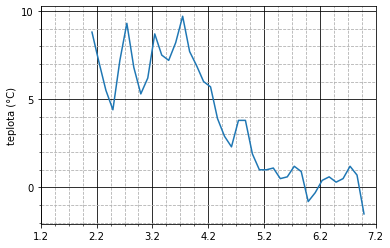

In [147]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, axes = plt.subplots()  # pro lepší nastavení potřebujeme získat odkaz na objekt třídy `Axes`
axes.xaxis.set_major_formatter(mdates.DateFormatter("%-d.%-m"))  # nastavení formátu hlavních popisek
axes.yaxis.set_major_locator(ticker.MultipleLocator(5))  # nastavení intervalu hlavního kroku na ose `y`
axes.yaxis.set_minor_locator(ticker.MultipleLocator(1))  # nastavení intervalu vedlejšího kroku na ose `y`
axes.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # nastavení intervalu vedlejšího kroku `x`
axes.set_xlim(times[0].date(), times[-1].date() + datetime.timedelta(days=1))  # nastavení rozsahu osy `x`
axes.grid(True, which="major", color="k")  # nastavení hlavní mřížky
axes.grid(True, which="minor", linestyle="--")  # nastavení vedlejší mřížky

axes.set_ylabel("teplota (°C)") # název osy `y`

plt.plot(times, temperatures) # a nyní můžeme konečně graf vykreslit

Skript pro vykreslení grafu má jen jediný povinný řádek, a to poslední s voláním metody `plot`.Vše ostatní je konfigurace vzhledu. Abychom mohli vzhled grafu nastavit, potřebujeme získat objekt representující tu část obrázku, která je řízena osami (kromě vlastních os do ní patří i mřížka, různé popisky, atd.).

Voláním funkce `mathplotlib.pyplot.subplots` získáme dvojici hodnot: jedna representuje obrázek jako celek (třída `Figure`), druhá pak výše zmíněný prostor daný osami (třída `Axes`). První je označena proměnou `fig` (díle už ji nevyužíváme), druhá pak proměnou `axes`.

Nad objektem os lze volat velké množství metod, z nichž využíváme ty, které nastavují popisky os (angl. *ticks* a mřížky). U osy `y` nastavuje interval hlavního kroku (popisek) na 5 a vedlejšího na 1 (stupeň Celsia).  Může se to zdát trochu složité, neboť parametrem těchto metod není číslo, ale objekt třídy `matplotlib.ticker.MultipleLockator`. *Matplotlib* však kromě fixního kroku podporuje i mnoho sofistikovanějších specifikací inetrvalů, které nemusí být konstantní.

U osy `x` nastavujeme interval vedlejších popisek na 6 hodin (interval hlavních popisek je automaticky 1 den, což nám vyhovuje). Upravíme i formát hlavních popisek (formát je shodný s metodou `datetime.datetime.strftime`, který již známe).

Poté nastavíme i mřížky (hlavní = *major* a vedlejší = *minor*). Specifikace vychází z frameworku Matlab a je pro začátečníky dost kryptická. Hlavní barvy jsou označeny jedním písmenem ('r' = *red*, 'b' = *blue*, černá je však `k`!), styl čar symbolicky pomocí běžných znaků ('--' je čárkovaní čára). Další možnosti viz např. https://python-graph-gallery.com/cheat-sheets/).

Zarovnání hlavních a vedlejších popisek na ose `x` vyžaduje, aby hodnoty na ose začínali v čase dělitelném šesti (0:00, 6:00, 12:00, 18:00). Zde je to dosaženo tím, že dolní limit je nastaven na půlnoc prvního dne (metoda `datetime.datetime` vrací objekt `datetime.date` representující půlnoc) a pro symetrii je nastaven i limit horní na půlnoc, která následuje za posledním časovým údajem (v případě půlnoci na následující půlnoc).

> **Úkol**: Zobrazte do jednoho grafu očekávaný tlak (přepočtený na hladinu moře) a vlhkost. Obě veličiny se liší v řádech proto použijte sekundární osu `y`.

> Rada: viz https://matplotlib.org/gallery/api/two_scales.html

In [148]:
# tato část je téměř beze změny

import requests
import datetime    
    
endpoint = "http://api.openweathermap.org/data/2.5/forecast"
params = {  # slovník parametrů
    "q" : "Dobříň", # jméno lokality (nahraďte za místo Vašeho pobytu)
     "appid" : get_api_key("/home/fiser/credentials/open_weather_map"),
    "mode" : "json" # formát výstupu
}

data= requests.get(endpoint, params).json()   # načtení JSON dat a jejich převod do slovníku

# extrakce do pole hodnot s liší jen v použitém jménu klíčů u tlaku a vlhkosti (chybí také přepočet)
times = [datetime.datetime.fromtimestamp(item["dt"]) for item in data["list"]]
pressures = [item["main"]["sea_level"] for item in data["list"]]
humidities = [item["main"]["humidity"] for item in data["list"]]

print(pressures)
print(humidities)

[1005, 1008, 1009, 1011, 1011, 1011, 1008, 1007, 1006, 1007, 1007, 1008, 1009, 1010, 1010, 1010, 1009, 1009, 1007, 1008, 1009, 1008, 1008, 1011, 1011, 1011, 1012, 1018, 1023, 1027, 1027, 1028, 1027, 1025, 1024, 1026, 1029, 1030, 1030, 1030]
[81, 87, 74, 75, 66, 58, 73, 93, 95, 84, 84, 87, 77, 62, 78, 82, 82, 80, 80, 80, 83, 69, 64, 78, 88, 89, 92, 96, 71, 72, 69, 73, 82, 79, 83, 95, 57, 48, 56, 61]


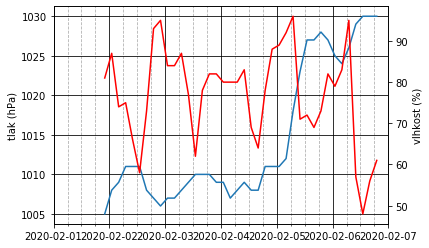

In [149]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, axes = plt.subplots()  # pro lepší nastavení potřebujeme získat odkaz na objekt třídy `Axes`
axes.xaxis.set_major_formatter(mdates.DateFormatter("%-d.%-m"))  # nastavení formátu hlavních popisek
axes.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # nastavení intervalu vedlejšího kroku `x`
axes.set_xlim(times[0].date(), times[-1].date() + datetime.timedelta(days=1))  # nastavení rozsahu osy `x`
axes.grid(True, which="major", color="k")  # nastavení hlavní mřížky
axes.grid(True, which="minor", linestyle="--")  # nastavení vedlejší mřížky

axes.set_ylabel("tlak (hPa)") # název osy `y`

axes.plot(times, pressures)

axes2 = axes.twinx() # přidáme druhou osu
# a pak ji nastavíme
axes.set_xlim(times[0].date(), times[-1].date() + datetime.timedelta(days=1)) # nutno nastavit i zde!
axes2.set_ylabel("vlhkost (%)")

axes2.plot(times, humidities, color="r")  # červeně pro odlošení

Vložení sekundární osy se provádí voláním metody `twinx` na objektu hlavních os. Vrací nový objekt os, který je možné do určité míry kustomizovat nezávisle. Nastavení limitů osy `x` musí však být stejné (a musí se explicitně uvádět, jinak se zvolí automatické, které překryje nastavení u primárních os). Lze dokonce nastavit i vlastní mřížku (výsledek však vypada strašně, ale zkuste si to).